In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

from lib.utility_functions import *
from lib.exp4 import *

sns.set_style('white')
sns.set_context('talk')

pd.set_option('display.max_columns', 40)

% matplotlib inline

/Users/gianni/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
tidy = pd.read_csv('./tidy_data.csv', index_col=0)

tidy['Condition'] = tidy['Condition'].map({'Trained': 1, 'Naive': 0})
tidy['Is Real'] = tidy['Is Real'].astype(np.uint8)

In [3]:
def regression_report(x_name, y_name, data, axes):
    x = tidy[x_name].values
    y = tidy[y_name].values

    reg = sts.linregress(x, y)

    xmin = x.min()
    xmax = x.max()
    xscale = (xmax - xmin) / 4
    
    reg_x = np.arange(xmin - xscale, xmax + xscale * 2, xscale)
    reg_y = reg.slope * reg_x + reg.intercept

    print('{} regression:'.format(x_name), reg, '\n')

    axes.plot(x, y, linestyle='none', marker='o', alpha=.1)
    axes.plot(reg_x, reg_y, linestyle='--')
    sns.despine()
    
    return reg

## Errors vs Condition

Condition regression: LinregressResult(slope=-0.5350877192982444, intercept=6.3930921052631575, rvalue=-0.06492530819688563, pvalue=8.701866372531623e-05, stderr=0.13620258719511524) 

Is Real regression: LinregressResult(slope=-2.1085526315789473, intercept=7.1798245614035086, rvalue=-0.2558429665217446, pvalue=1.3032109283482276e-55, stderr=0.13194793440460398) 

Num Pieces regression: LinregressResult(slope=0.7876461988304093, intercept=-5.295321637426899, rvalue=0.4379553792741595, pvalue=7.605264237729162e-171, stderr=0.026776332169987347) 



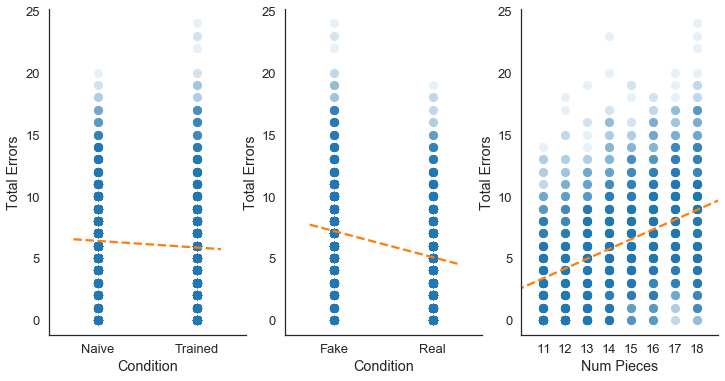

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

condition_regression = regression_report('Condition', 'Total Errors', tidy, axes[0])
position_type_regression = regression_report('Is Real', 'Total Errors', tidy, axes[1])
num_pieces_regression = regression_report('Num Pieces', 'Total Errors', tidy, axes[2])

plt.setp(
    axes[0], 
    xlabel='Condition', xlim=[-.5, 1.5], xticks=[0, 1], xticklabels=['Naive', 'Trained'],
    ylabel='Total Errors'
);

plt.setp(
    axes[1], 
    xlabel='Condition', xlim=[-.5, 1.5], xticks=[0, 1], xticklabels=['Fake', 'Real'],
    ylabel='Total Errors'
);

plt.setp(
    axes[2], 
    xlabel='Num Pieces', xlim=[10, 19], 
    xticks=np.arange(11, 19, 1), xticklabels=np.arange(11, 19, 1, dtype=np.uint8),
    ylabel='Total Errors'
);